<a href="https://colab.research.google.com/github/sagarrepala/21BK5A6606/blob/main/mental_fitness_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [8]:
df1 = pd.read_csv('mental_share_dataset.csv')
df2 = pd.read_csv('mental_substance_disorder.csv')

In [9]:
df1.head()


,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [10]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [69]:
df1.tail()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949
6839,Zimbabwe,ZWE,2019,2.525892


import numpy as np
from google.colab import autoviz
df_6302091507168378743 = autoviz.get_registered_df('df_6302091507168378743')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6302091507168378743, *['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8924950068982801631 = autoviz.get_registered_df('df_8924950068982801631')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8924950068982801631, *['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5584325761995383619 = autoviz.get_registered_df('df_5584325761995383619')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5584325761995383619, *['Year', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_906896900990381049 = autoviz.get_registered_df('df_906896900990381049')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_906896900990381049, *['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)', 'count()', None], **{})
chart

In [70]:
df2.tail()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711
6839,Zimbabwe,ZWE,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729


import numpy as np
from google.colab import autoviz
df_8623324070208060281 = autoviz.get_registered_df('df_8623324070208060281')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8623324070208060281, *['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3869842867977486655 = autoviz.get_registered_df('df_3869842867977486655')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3869842867977486655, *['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_47792802556983093 = autoviz.get_registered_df('df_47792802556983093')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_47792802556983093, *['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_320276220671109026 = autoviz.get_registered_df('df_320276220671109026')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_320276220671109026, *['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6247287571558252258 = autoviz.get_registered_df('df_6247287571558252258')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6247287571558252258, *['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7870832577658846557 = autoviz.get_registered_df('df_7870832577658846557')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7870832577658846557, *['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2640102556694701418 = autoviz.get_registered_df('df_2640102556694701418')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2640102556694701418, *['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3921013143419833367 = autoviz.get_registered_df('df_3921013143419833367')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3921013143419833367, *['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8178231187686971750 = autoviz.get_registered_df('df_8178231187686971750')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8178231187686971750, *[[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)'], ['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'], ['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)'], ['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1026292753659616259 = autoviz.get_registered_df('df_1026292753659616259')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1026292753659616259, *['Year', 'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_1123472071537850680 = autoviz.get_registered_df('df_1123472071537850680')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1123472071537850680, *['Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8888522605845226744 = autoviz.get_registered_df('df_8888522605845226744')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8888522605845226744, *['Year', 'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6539572813807557721 = autoviz.get_registered_df('df_6539572813807557721')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6539572813807557721, *['Year', 'count()', None], **{})
chart

In [14]:
data = pd.merge(df1,df2)
data.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [15]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [21]:
data.drop('Code',axis =1,inplace = True)

In [22]:
data.head()

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [23]:
data.size,data.shape


(68400, (6840, 10))

In [24]:
column_labels = ['Country', 'Year', 'Mental_fitness', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 'Anxiety_disorders', 'Drug_use_disorders', 'Depressive_disorders', 'Alcohol_use_disorders']
data.set_axis(column_labels, axis='columns', inplace=True)


In [25]:
data.head()

,Country,Year,Mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depressive_disorders,Alcohol_use_disorders
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


[]

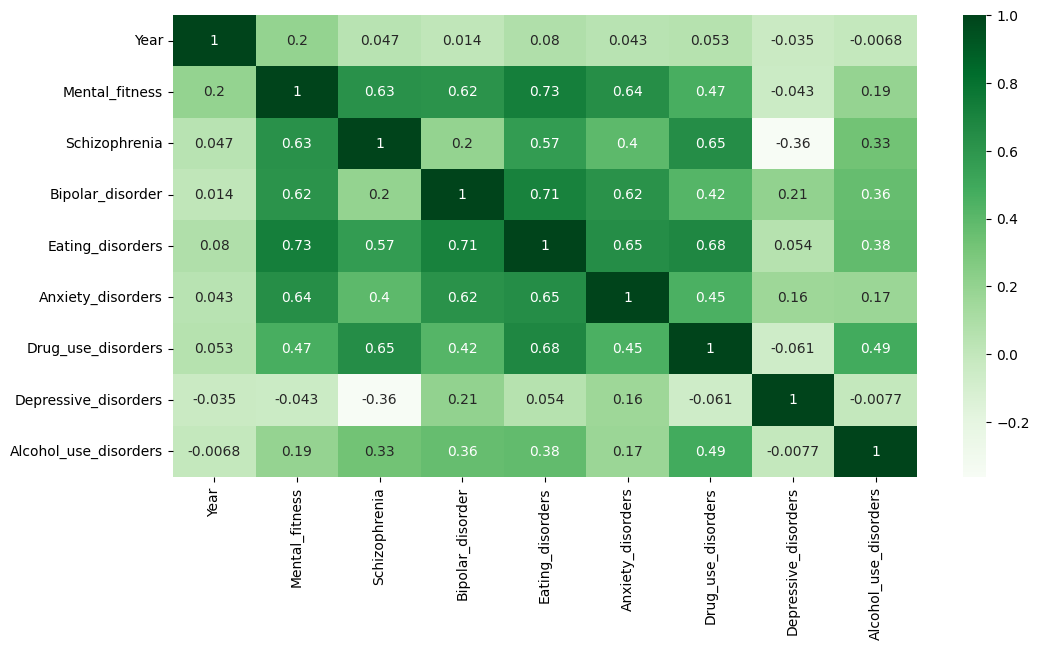

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.plot()

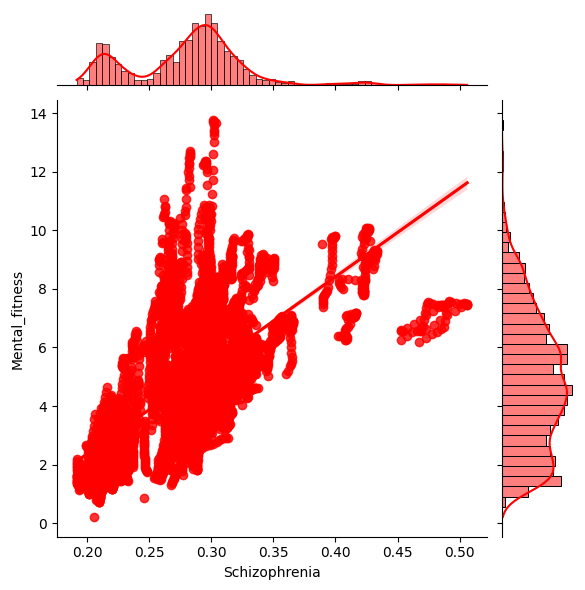

In [27]:
sns.jointplot(x='Schizophrenia', y='Mental_fitness', data=data, kind= 'reg', color ='red')

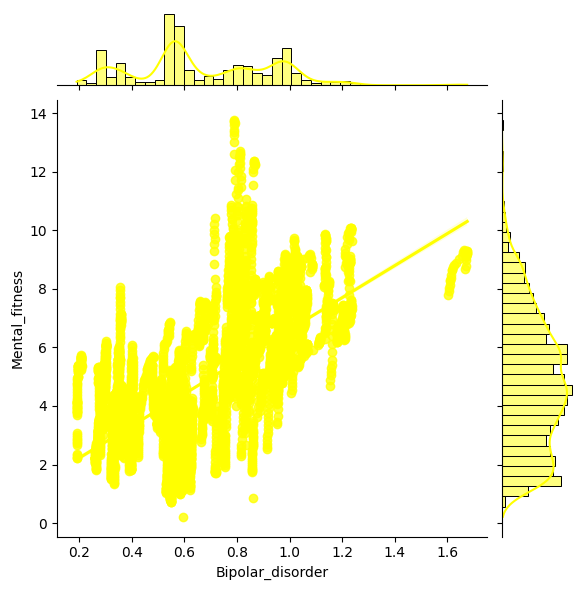

In [28]:
sns.jointplot(x='Bipolar_disorder', y='Mental_fitness', data=data, kind= 'reg', color ='yellow')

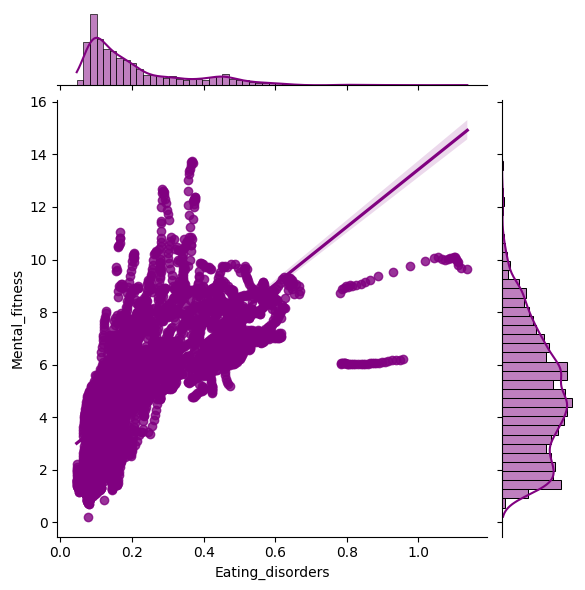

In [29]:
sns.jointplot(x='Eating_disorders', y='Mental_fitness', data=data, kind= 'reg', color ='purple')

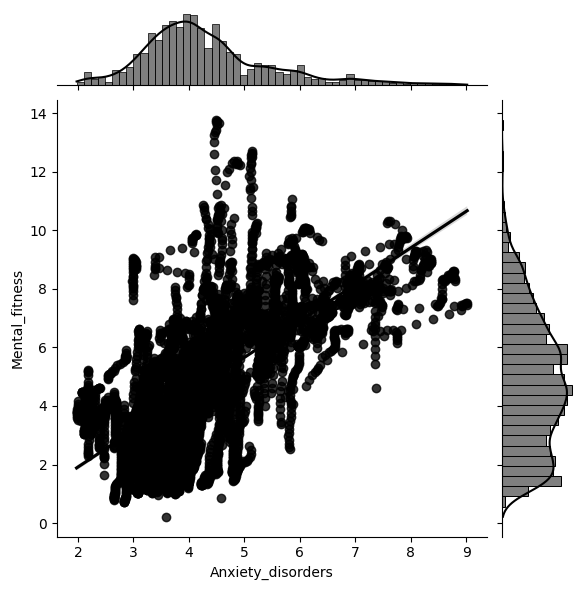

In [30]:
sns.jointplot(x='Anxiety_disorders', y='Mental_fitness', data=data, kind= 'reg', color ='black')

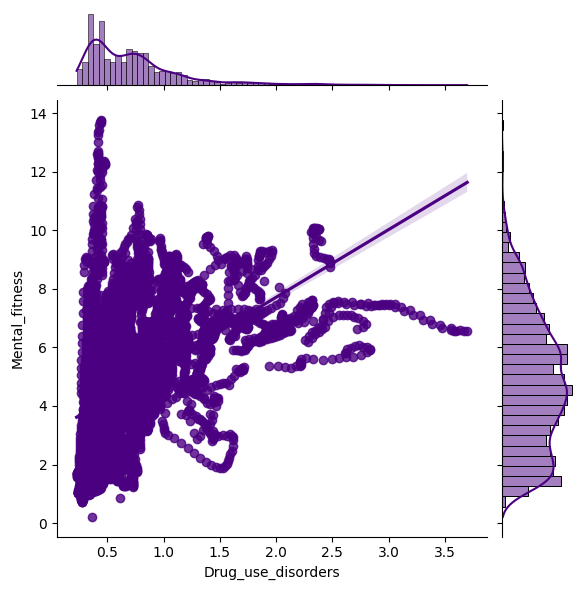

In [31]:
sns.jointplot(x='Drug_use_disorders', y='Mental_fitness', data=data, kind= 'reg', color ='indigo')

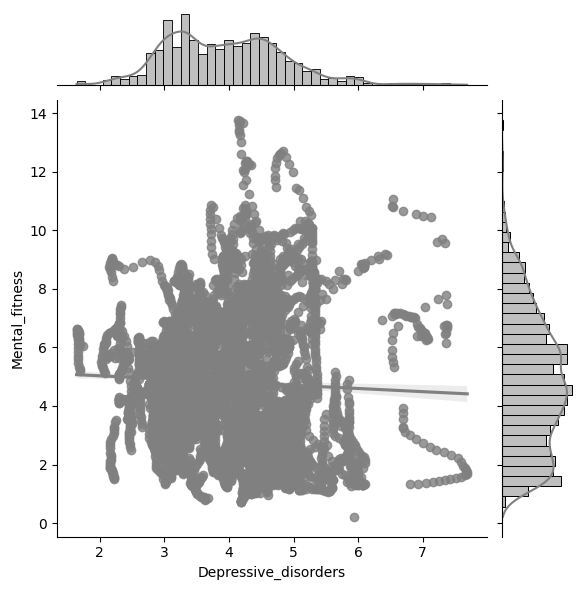

In [32]:
sns.jointplot(x='Depressive_disorders', y='Mental_fitness', data=data, kind= 'reg', color ='grey')

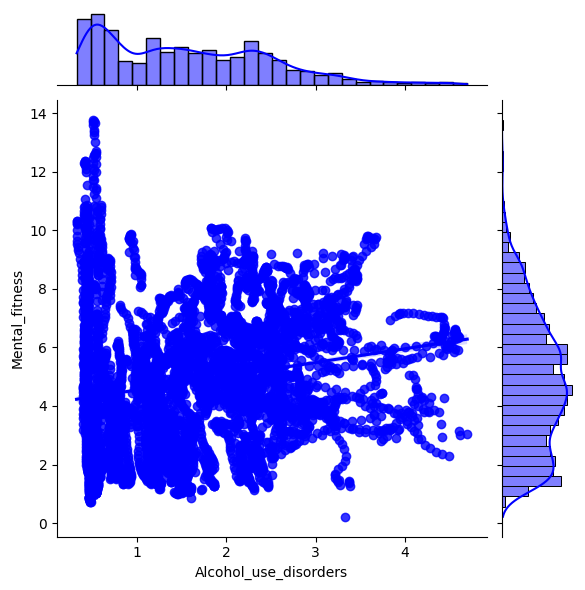

In [33]:
sns.jointplot(x='Alcohol_use_disorders', y='Mental_fitness', data=data, kind= 'reg', color ='blue')

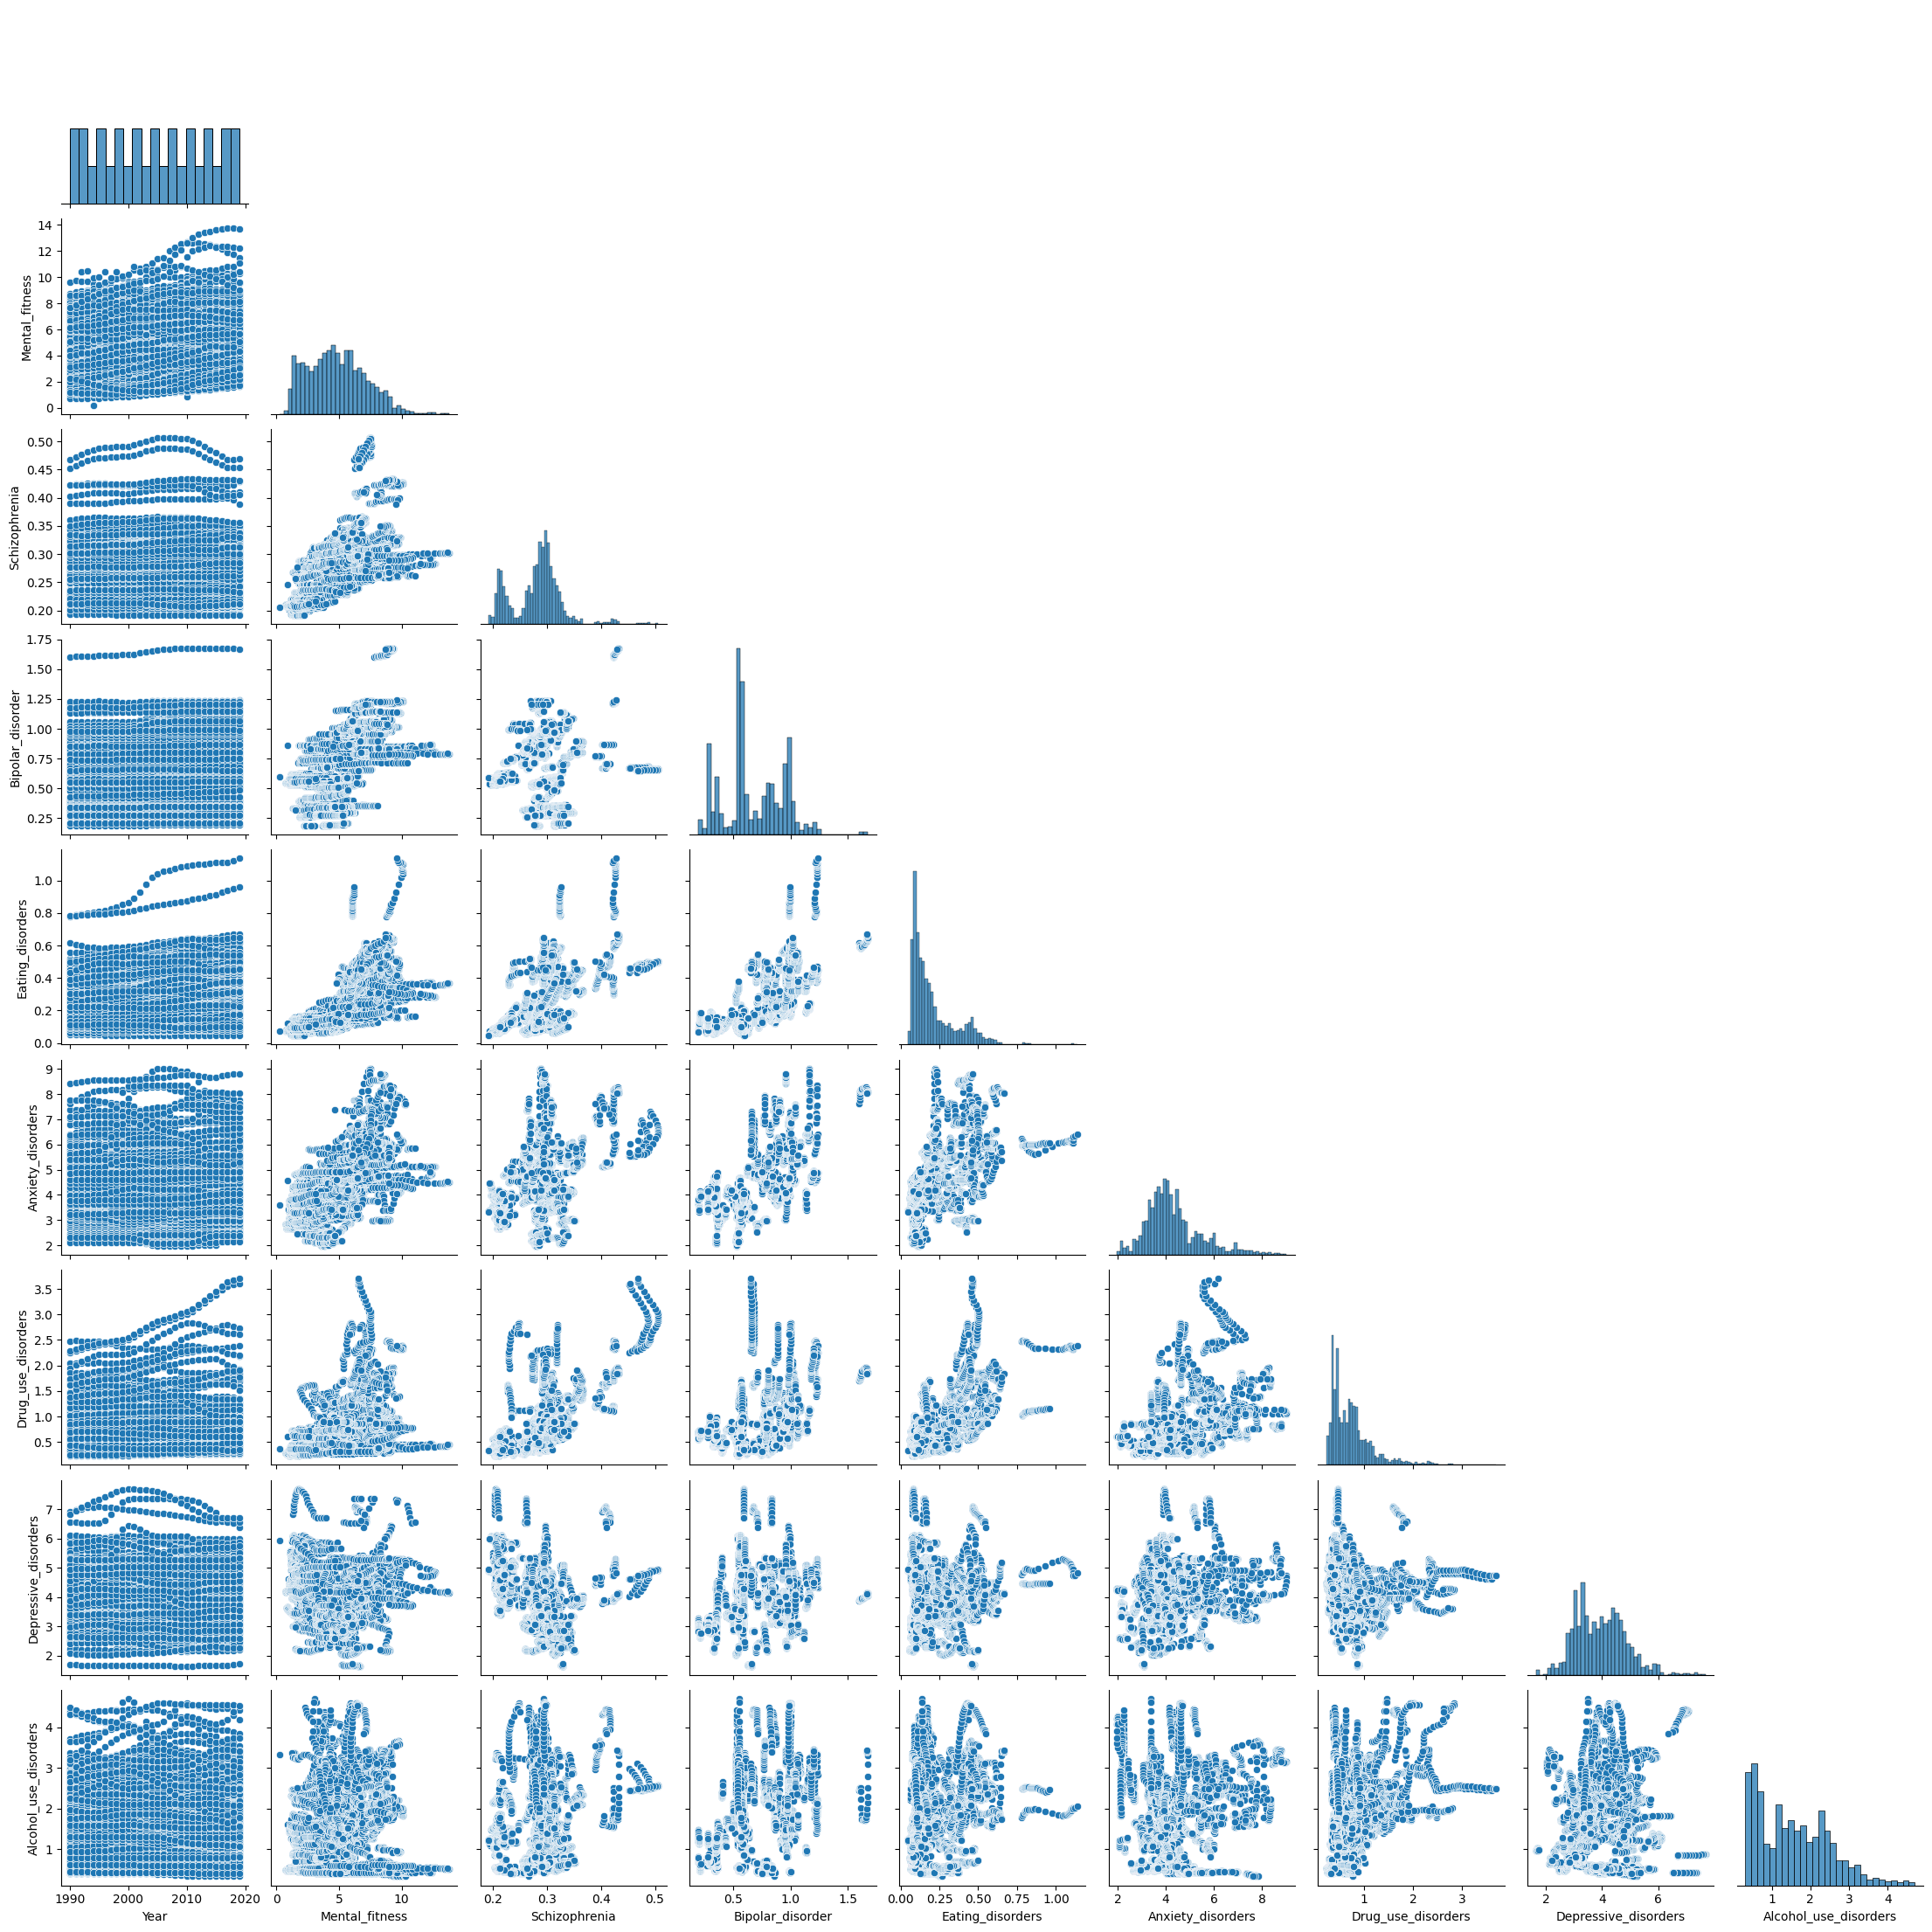

In [34]:
sns.pairplot(data,corner=True)
plt.show()

In [35]:
mean =data['Mental_fitness'].mean()
mean

4.8180618117506135

In [36]:
fig = px.pie(data, values='Year', names='Year')
fig.show()

In [37]:
fig = px.pie(data, values='Alcohol_use_disorders', names='Year')
fig.show()

In [38]:
fig=px.bar(data.head(10), x = 'Year', y='Mental_fitness', color = 'Year', template = 'ggplot2')
fig.show()

In [39]:
fig=px.line(data, x = 'Year', y='Mental_fitness', color = 'Country', markers ='True', color_discrete_sequence= ['red', 'blue'] , template = 'plotly_dark')
fig.show()

In [40]:
df = data.copy()

In [41]:
df.head()

,Country,Year,Mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depressive_disorders,Alcohol_use_disorders
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                6840 non-null   object 
 1   Year                   6840 non-null   int64  
 2   Mental_fitness         6840 non-null   float64
 3   Schizophrenia          6840 non-null   float64
 4   Bipolar_disorder       6840 non-null   float64
 5   Eating_disorders       6840 non-null   float64
 6   Anxiety_disorders      6840 non-null   float64
 7   Drug_use_disorders     6840 non-null   float64
 8   Depressive_disorders   6840 non-null   float64
 9   Alcohol_use_disorders  6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[1] = l.fit_transform(df[1])


In [48]:
x = df.drop('Mental_fitness', axis=1)
y = df['Mental_fitness']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

ytrain_pred = lr.predict(x_train)
mse = (mean_squared_error(y_train, ytrain_pred))
rmse = (np.sqrt(mean_squared_error(y_train, ytrain_pred)))
r2 = r2_score(y_train, ytrain_pred)
print('The model performance for data is')
print('------------------------------------')
print('MSE IS {}'.format(mse))
print('RMSE IS {}'.format(rmse))
print('R2 IS {}'.format(r2))

ytest_pred = lr.predict(x_test)
mse = (mean_squared_error(y_test, ytest_pred))
rmse = (np.sqrt(mean_squared_error(y_test, ytest_pred)))
r2 = r2_score(y_test, ytest_pred)
print('The model performance for testing data is')
print('------------------------------------')
print('MSE IS {}'.format(mse))
print('RMSE IS {}'.format(rmse))
print('R2 IS {}'.format(r2))



The model performance for data is
------------------------------------
MSE IS 1.3899593726460284
RMSE IS 1.1789653822933175
R2 IS 0.7413245789578199
The model performance for testing data is
------------------------------------
MSE IS 1.1357545317554194
RMSE IS 1.0657178480983696
R2 IS 0.7638974087412453


In [67]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print('The model performance for the data is:')
print('----------------------------------------')
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print('\n')

ytest_pred = lr.predict(x_test)
mse = (mean_squared_error(y_test, ytest_pred))
rmse = (np.sqrt(mean_squared_error(y_test, ytest_pred)))
r2 = r2_score(y_test, ytest_pred)
print('The model performance for testing data is')
print('------------------------------------')
print('MSE IS {}'.format(mse))
print('RMSE IS {}'.format(rmse))
print('R2 IS {}'.format(r2))




The model performance for the data is:
----------------------------------------
MSE: 0.004832546495167104
RMSE: 0.06951651958467933
R2: 0.9991006492535364


The model performance for testing data is
------------------------------------
MSE IS 1.1357545317554194
RMSE IS 1.0657178480983696
R2 IS 0.7638974087412453
